In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import os
from PIL import  Image
from tqdm.autonotebook import  tqdm
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    


/home/pratyush/miniconda3/envs/cvpr/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


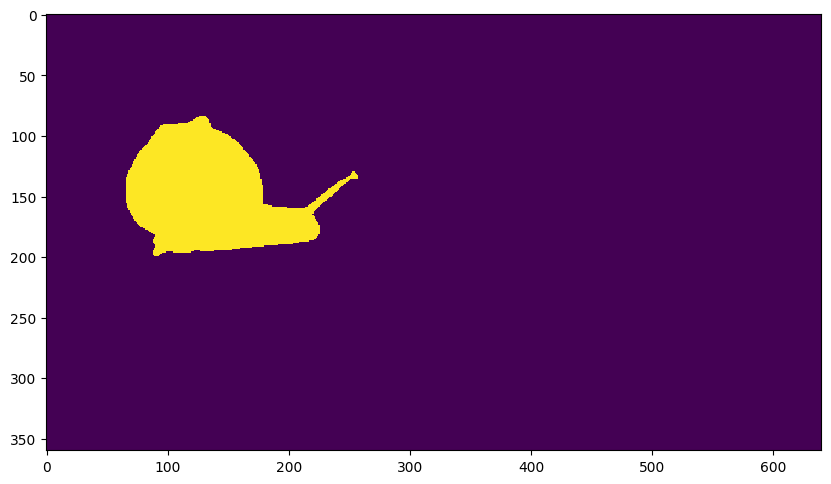

[151 176]
(1, 2)


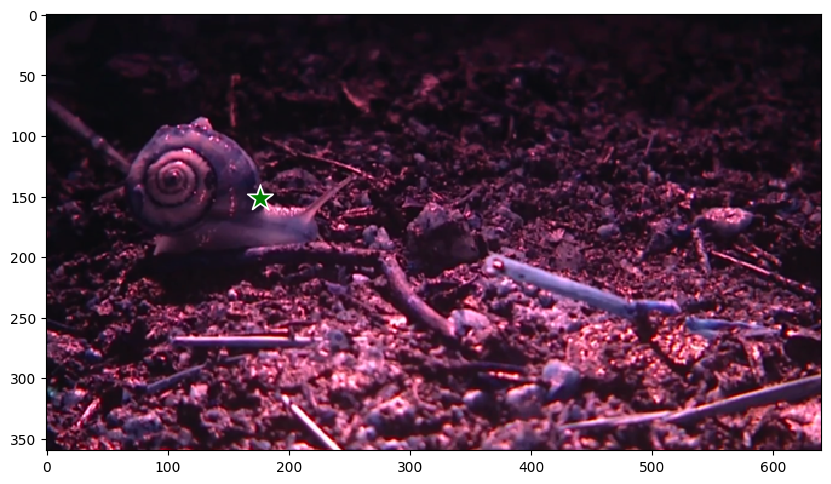

In [3]:
image = cv2.imread('/home/pratyush/Desktop/sam/CamouflagedAnimalDataset/CamouflagedAnimalDataset/snail/frames/snail_001.png')
gt = cv2.imread('/home/pratyush/Desktop/sam/CamouflagedAnimalDataset/CamouflagedAnimalDataset/snail/groundtruth/001_gt.png',cv2.IMREAD_GRAYSCALE)
# # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.imshow(gt)
# print(np.unique(gt))
# print(gt.shape)
h,w,_ = image.shape
plt.figure(figsize=(10,10))
plt.imshow(gt)
plt.axis('on')
plt.show()
# non_zero_points = np.argwhere(gt!=0)
# input_point = np.array([[non_zero_points[np.random.choice(len(non_zero_points))],
#                         non_zero_points[np.random.choice(len(non_zero_points))]]])

non_zero_points = np.argwhere(gt!=0)
print(non_zero_points[len(non_zero_points)//2])
h,w = non_zero_points[len(non_zero_points)//2]
# print(random_point)
# x,y = random_point
# input_point = np.array([non_zero_points[np.random.choice(len(non_zero_points))]])
input_point = np.array([[w,h]])
print(input_point.shape)
input_label = np.array([1])

plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()  

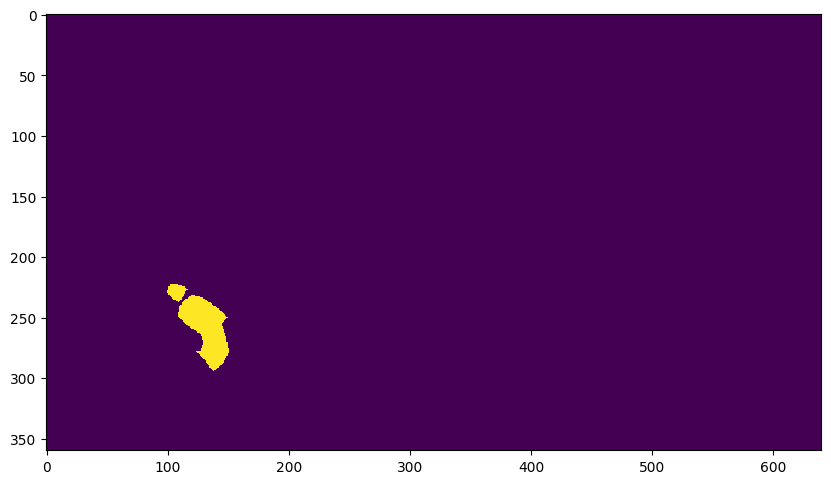

[223 102]
(1, 2)


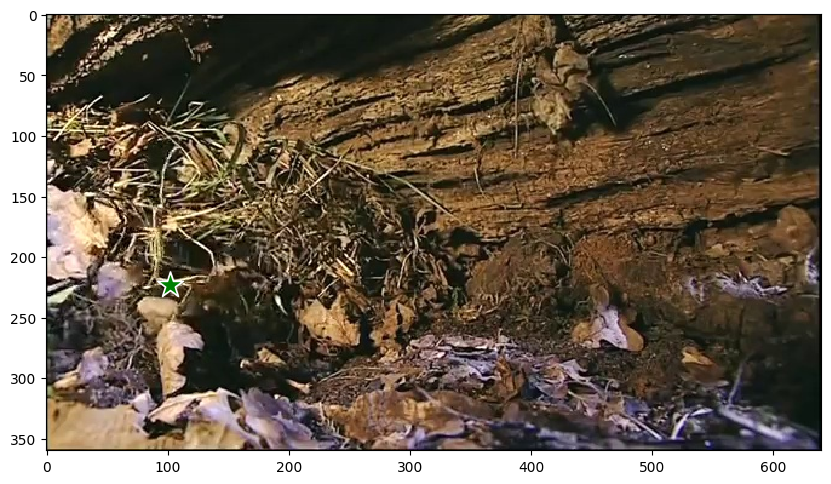

In [2]:
image = cv2.cvtColor(cv2.imread('dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/hedgehog_3/Imgs/00010.jpg'),cv2.COLOR_BGR2RGB)
gt = cv2.imread('dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/hedgehog_3/GT/00010.png',cv2.IMREAD_GRAYSCALE)
# # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.imshow(gt)
# print(np.unique(gt))
# print(gt.shape)
h,w,_ = image.shape
plt.figure(figsize=(10,10))
plt.imshow(gt)
plt.axis('on')
plt.show()
# non_zero_points = np.argwhere(gt!=0)
# input_point = np.array([[non_zero_points[np.random.choice(len(non_zero_points))],
#                         non_zero_points[np.random.choice(len(non_zero_points))]]])

non_zero_points = np.argwhere(gt!=0)
print(non_zero_points[0])
h,w = non_zero_points[0]
# print(random_point)
# x,y = random_point
# input_point = np.array([non_zero_points[np.random.choice(len(non_zero_points))]])
input_point = np.array([[w,h]])
print(input_point.shape)
input_label = np.array([1])

plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()  

In [4]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "/home/pratyush/Desktop/sam/sam_vit_b_01ec64.pth"
model_type = "vit_b"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

predictor.set_image(image)

In [5]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,)

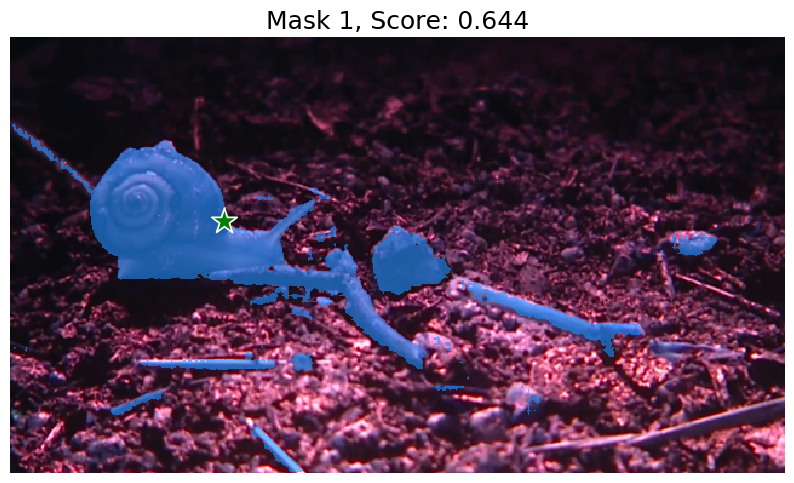

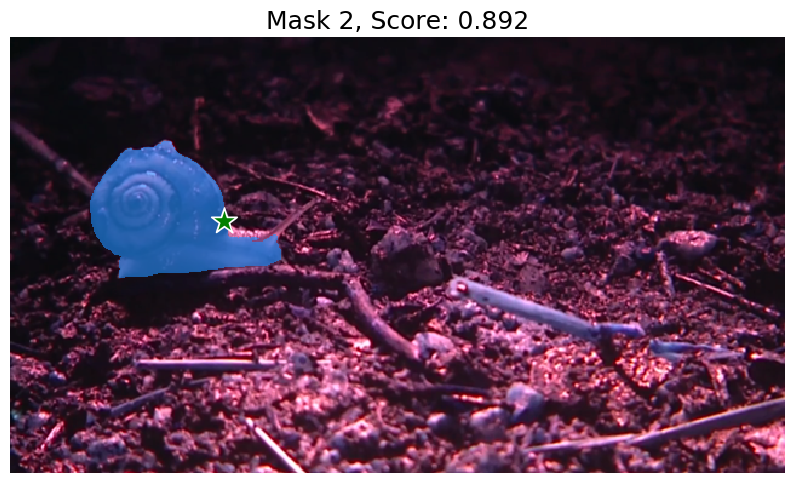

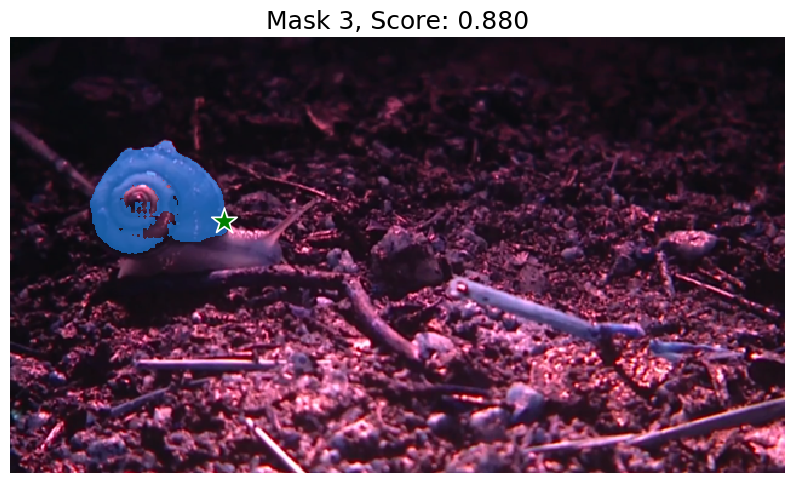

In [6]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  
  

In [13]:
directory = '/home/pratyush/Desktop/sam/CamouflagedAnimalDataset/CamouflagedAnimalDataset'
for i in sorted(os.listdir(directory)):
    if i.startswith('.'):
        continue
    print(i)
    folder_path = os.path.join(directory,i+'/frames/'+i)
    gt_path =os.path.join(directory,i+'/groundtruth')
    os.makedirs(directory+'/'+i+'/sam_base_output',exist_ok=True)
    os.makedirs(directory+'/'+i+'/sam_output_visualistic',exist_ok=True)
    for j in tqdm(sorted(os.listdir(gt_path))):
        # print(folder_path[-16:])
        camouflage_img = folder_path + '_'+j[:-7]+".png"
     
        gt_image = os.path.join(gt_path,j)

        # print(gt_path[:-12]+"/sam_base_output/"+j[:-4]+".png")
        # break

        image = cv2.cvtColor(cv2.imread(camouflage_img),cv2.COLOR_BGR2RGB)
        gt= cv2.imread(gt_image,cv2.IMREAD_GRAYSCALE)

        h,w = gt.shape
        
        non_zero_points = np.argwhere(gt!=0)
        # print(non_zero_points[0])
        try:
            h,w = non_zero_points[len(non_zero_points)//2]
        except IndexError as e:
            print(f"{e}")
            continue

        input_point = np.array([[w,h]])
        # print(input_point.shape)
        input_label = np.array([1])

        predictor.set_image(image)
        masks, scores, logits = predictor.predict(
                                point_coords=input_point,
                                point_labels=input_label,
                                multimask_output=True,)

        idx = np.argmax(scores)

        img = Image.fromarray(masks[idx])
        img.save(gt_path[:-12]+"/sam_base_output/"+j[:-4]+".png")

        plt.imshow(image)
        show_mask(masks[idx],plt.gca())
        show_points(input_point, input_label, plt.gca())
        plt.savefig(gt_path[:-12]+"/sam_output_visualistic/"+j[:-4]+".png")
        plt.axis('off')
        plt.close()

        del idx,masks,scores,logits,h,w,non_zero_points

    # del folder_path,gt_path

        


chameleon


100%|██████████| 43/43 [00:15<00:00,  2.75it/s]


frog


100%|██████████| 30/30 [00:07<00:00,  4.21it/s]


index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
glowwormbeetle


100%|██████████| 21/21 [00:07<00:00,  2.81it/s]


scorpion1


100%|██████████| 21/21 [00:07<00:00,  2.79it/s]


scorpion2


100%|██████████| 12/12 [00:04<00:00,  2.74it/s]


scorpion3


100%|██████████| 15/15 [00:05<00:00,  2.72it/s]


scorpion4


100%|██████████| 16/16 [00:05<00:00,  2.75it/s]


snail


100%|██████████| 17/17 [00:06<00:00,  2.81it/s]


stickinsect


100%|██████████| 16/16 [00:05<00:00,  2.89it/s]


In [16]:
from metrics import  calculate_measures
directory = '/home/pratyush/Desktop/sam/CamouflagedAnimalDataset/CamouflagedAnimalDataset'
results = []
for i in tqdm(sorted(os.listdir(directory))):
    if i.startswith('.'):
        continue
    sm_path = os.path.join(directory,i+'/sam_base_output/')
    gt_path =os.path.join(directory,i+'/groundtruth/')

    
    res = calculate_measures(gt_path,sm_path,['E-measure','S-measure','Wgt-F','MAE'],save=False)
    print(res)
    print(gt_path)
    results.append(res)


 20%|██        | 2/10 [00:01<00:04,  1.77it/s]

{'E-measure': 0.5226139716942763, 'S-measure': 0.6627538831682551, 'Wgt-F': 0.38004523757853137, 'MAE': 0.10441093346253229}
/home/pratyush/Desktop/sam/CamouflagedAnimalDataset/CamouflagedAnimalDataset/chameleon/groundtruth/



026_gt.png not found!
------------------------------

028_gt.png not found!
------------------------------

022_gt.png not found!
------------------------------



027_gt.png not found!
------------------------------

030_gt.png not found!
------------------------------

023_gt.png not found!
------------------------------

029_gt.png not found!
------------------------------

024_gt.png not found!
------------------------------

021_gt.png not found!
------------------------------

025_gt.png not found!
------------------------------


 30%|███       | 3/10 [00:01<00:03,  1.91it/s]

{'E-measure': 0.6678329170477425, 'S-measure': 0.733803286701419, 'Wgt-F': 0.5007268957664885, 'MAE': 0.1941330295138889}
/home/pratyush/Desktop/sam/CamouflagedAnimalDataset/CamouflagedAnimalDataset/frog/groundtruth/


 40%|████      | 4/10 [00:02<00:03,  1.92it/s]

{'E-measure': 0.31000265985260766, 'S-measure': 0.5745040082118763, 'Wgt-F': 0.13635905117260871, 'MAE': 0.1538058035714286}
/home/pratyush/Desktop/sam/CamouflagedAnimalDataset/CamouflagedAnimalDataset/glowwormbeetle/groundtruth/


 50%|█████     | 5/10 [00:02<00:02,  1.93it/s]

{'E-measure': 0.4991394248829579, 'S-measure': 0.6310445402784544, 'Wgt-F': 0.2987680997404328, 'MAE': 0.19669663525132278}
/home/pratyush/Desktop/sam/CamouflagedAnimalDataset/CamouflagedAnimalDataset/scorpion1/groundtruth/


 60%|██████    | 6/10 [00:02<00:01,  2.25it/s]

{'E-measure': 0.4049201992386035, 'S-measure': 0.5868122439614156, 'Wgt-F': 0.23889691636680768, 'MAE': 0.09993742766203705}
/home/pratyush/Desktop/sam/CamouflagedAnimalDataset/CamouflagedAnimalDataset/scorpion2/groundtruth/


 70%|███████   | 7/10 [00:03<00:01,  2.44it/s]

{'E-measure': 0.821766549098882, 'S-measure': 0.7554836050193898, 'Wgt-F': 0.5843047497430613, 'MAE': 0.06435995370370369}
/home/pratyush/Desktop/sam/CamouflagedAnimalDataset/CamouflagedAnimalDataset/scorpion3/groundtruth/


 80%|████████  | 8/10 [00:03<00:00,  2.44it/s]

{'E-measure': 0.4609931142889618, 'S-measure': 0.6291429226447663, 'Wgt-F': 0.2989209584626871, 'MAE': 0.09003607855902777}
/home/pratyush/Desktop/sam/CamouflagedAnimalDataset/CamouflagedAnimalDataset/scorpion4/groundtruth/


 90%|█████████ | 9/10 [00:04<00:00,  2.46it/s]

{'E-measure': 0.776944599289136, 'S-measure': 0.8416261324764188, 'Wgt-F': 0.6831844349756953, 'MAE': 0.019887408088235293}
/home/pratyush/Desktop/sam/CamouflagedAnimalDataset/CamouflagedAnimalDataset/snail/groundtruth/


100%|██████████| 10/10 [00:04<00:00,  2.26it/s]

{'E-measure': 0.4249508498495748, 'S-measure': 0.5574572290980839, 'Wgt-F': 0.1872791311481715, 'MAE': 0.30121799045138886}
/home/pratyush/Desktop/sam/CamouflagedAnimalDataset/CamouflagedAnimalDataset/stickinsect/groundtruth/


In [17]:
results

[{'E-measure': 0.5226139716942763,
  'S-measure': 0.6627538831682551,
  'Wgt-F': 0.38004523757853137,
  'MAE': 0.10441093346253229},
 {'E-measure': 0.6678329170477425,
  'S-measure': 0.733803286701419,
  'Wgt-F': 0.5007268957664885,
  'MAE': 0.1941330295138889},
 {'E-measure': 0.31000265985260766,
  'S-measure': 0.5745040082118763,
  'Wgt-F': 0.13635905117260871,
  'MAE': 0.1538058035714286},
 {'E-measure': 0.4991394248829579,
  'S-measure': 0.6310445402784544,
  'Wgt-F': 0.2987680997404328,
  'MAE': 0.19669663525132278},
 {'E-measure': 0.4049201992386035,
  'S-measure': 0.5868122439614156,
  'Wgt-F': 0.23889691636680768,
  'MAE': 0.09993742766203705},
 {'E-measure': 0.821766549098882,
  'S-measure': 0.7554836050193898,
  'Wgt-F': 0.5843047497430613,
  'MAE': 0.06435995370370369},
 {'E-measure': 0.4609931142889618,
  'S-measure': 0.6291429226447663,
  'Wgt-F': 0.2989209584626871,
  'MAE': 0.09003607855902777},
 {'E-measure': 0.776944599289136,
  'S-measure': 0.8416261324764188,
  'Wgt-

In [18]:
s_measure = 0
e_measure = 0
wgt_f= 0
mae = 0
for i in range(len(results)):
    e_measure += results[i]['E-measure']
    wgt_f += results[i]['Wgt-F']
    mae += results[i]['MAE']
    s_measure += results[i]['S-measure']

In [20]:
# middle point prompting  - CAD DATASET
print(f'E_measure {e_measure/9}')
print(f'Wgt-F {wgt_f/9}')
print(f'mae {mae/9}')
print(f's_measure {s_measure/9}' )

E_measure 0.5432404761380825
Wgt-F 0.36760949721716496
mae 0.1360539178070628
s_measure 0.6636253168400089


In [12]:
0/0

ZeroDivisionError: division by zero

In [22]:
directory = '/home/pratyush/Desktop/sam/dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq'
for i in tqdm(os.listdir(directory)):
    folder_path = os.path.join(directory,i+'/Imgs')
    gt_path =os.path.join(directory,i+'/GT')
    # print(gt_path)
    os.makedirs(directory+'/'+i+'/sam_output_middle',exist_ok=True)
    os.makedirs(directory+'/'+i+'/sam_output_visualistic_middle',exist_ok=True)
    
    for j in tqdm(sorted(os.listdir(folder_path))):

        img_path = os.path.join(folder_path,j)
        # print(img_path[:-15])
        
        image = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)
        gt= cv2.imread(os.path.join(gt_path,j[:5])+".png",cv2.IMREAD_GRAYSCALE)
        h,w = gt.shape
        
        non_zero_points = np.argwhere(gt!=0)
        # print(non_zero_points[0])
        h,w = non_zero_points[len(non_zero_points)//2]

        input_point = np.array([[w,h]])
        # print(input_point.shape)
        input_label = np.array([1])

        predictor.set_image(image)
        masks, scores, logits = predictor.predict(
                                point_coords=input_point,
                                point_labels=input_label,
                                multimask_output=True,)

        idx = np.argmax(scores)
        # print(img_path[:-15]+"/sam_output/"+j)
        # plt.imshow(masks[idx],cmap='gray')
        # plt.savefig(img_path[:-15]+"/sam_output/"+j[:-4]+".png")
        # plt.axis('off')
        # plt.close()

        img = Image.fromarray(masks[idx])
        img.save(img_path[:-15]+"/sam_output_middle/"+j[:-4]+".png")

        plt.imshow(image)
        show_mask(masks[idx],plt.gca())
        # show_points(input_point, input_label, plt.gca())
        plt.savefig(img_path[:-15]+"/sam_output_visualistic_middle/"+j[:-4]+".png")
        plt.axis('off')
        plt.close()

        del idx,masks,scores,logits,h,w,non_zero_points

    del folder_path,gt_path
        
        



100%|██████████| 16/16 [05:06<00:00, 19.15s/it]


In [7]:
from metrics import  calculate_measures
directory = 'dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq'
results = []
for i in tqdm(sorted(os.listdir(directory))):
    sm_path = os.path.join(directory,i+'/sam_output/')
    gt_path =os.path.join(directory,i+'/GT/')
    
    res = calculate_measures(gt_path,sm_path,['E-measure','S-measure','Wgt-F','MAE'],save=False)
    print(res)
    print(gt_path)
    results.append(res)


  6%|▋         | 1/16 [00:03<00:46,  3.12s/it]

{'E-measure': 0.6430424599211082, 'S-measure': 0.7350399351196935, 'Wgt-F': 0.42321597643454584, 'MAE': 0.02881376591435185}
dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/arctic_fox/GT/


 12%|█▎        | 2/16 [00:06<00:45,  3.26s/it]/home/pratyush/miniconda3/envs/cvpr/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pratyush/miniconda3/envs/cvpr/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pratyush/miniconda3/envs/cvpr/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/pratyush/miniconda3/envs/cvpr/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/pratyush/miniconda3/envs/cvpr/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret 

{'E-measure': 0.8972931905773086, 'S-measure': 0.8682799847859286, 'Wgt-F': 0.7630512824967557, 'MAE': 0.0011820126488095238}
dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/arctic_fox_3/GT/


 19%|█▉        | 3/16 [00:14<00:58,  4.53s/it]

{'E-measure': 0.48490133891323217, 'S-measure': nan, 'Wgt-F': 0.13028183410476055, 'MAE': 0.03601913289573821}
dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/black_cat_1/GT/


 25%|██▌       | 4/16 [00:22<01:09,  5.80s/it]

{'E-measure': 0.5046983937862999, 'S-measure': nan, 'Wgt-F': 0.10235497790511051, 'MAE': 0.012669545368975906}
dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/copperhead_snake/GT/


 31%|███▏      | 5/16 [00:27<00:58,  5.33s/it]

{'E-measure': 0.5512504481002584, 'S-measure': 0.6083351402185686, 'Wgt-F': 0.15413790709602088, 'MAE': 0.05802471245659722}
dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/flower_crab_spider_0/GT/


 38%|███▊      | 6/16 [00:31<00:51,  5.16s/it]

{'E-measure': 0.613357938599232, 'S-measure': 0.5877372939274994, 'Wgt-F': 0.13297438514091658, 'MAE': 0.02449300130208333}
dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/flower_crab_spider_1/GT/


 44%|████▍     | 7/16 [00:35<00:41,  4.58s/it]

{'E-measure': 0.39354225079635147, 'S-measure': 0.683315786378964, 'Wgt-F': 0.07822794644971963, 'MAE': 0.023883933738425924}
dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/flower_crab_spider_2/GT/


 50%|█████     | 8/16 [00:35<00:27,  3.38s/it]

{'E-measure': 0.48368861260791063, 'S-measure': 0.5492189713260766, 'Wgt-F': 0.13536371491871635, 'MAE': 0.07751215277777777}
dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/hedgehog_3/GT/


 56%|█████▋    | 9/16 [00:38<00:21,  3.13s/it]

{'E-measure': 0.6615450178168595, 'S-measure': 0.7200204867739117, 'Wgt-F': 0.4568211309982544, 'MAE': 0.013171571180555557}
dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/ibex/GT/


 62%|██████▎   | 10/16 [00:39<00:15,  2.51s/it]

{'E-measure': 0.6136951578180966, 'S-measure': 0.6311867158026931, 'Wgt-F': 0.2026750009991579, 'MAE': 0.0057267795138888885}
dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/mongoose/GT/


 69%|██████▉   | 11/16 [00:41<00:11,  2.32s/it]

{'E-measure': 0.7671583602002258, 'S-measure': 0.5644519952106719, 'Wgt-F': 0.136410468444573, 'MAE': 0.021248204441338615}
dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/moth/GT/


 75%|███████▌  | 12/16 [00:43<00:08,  2.24s/it]

{'E-measure': 0.8873593816291034, 'S-measure': 0.8050550439627644, 'Wgt-F': 0.6256293478387763, 'MAE': 0.0028554687500000004}
dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/pygmy_seahorse_0/GT/


 81%|████████▏ | 13/16 [00:45<00:06,  2.19s/it]

{'E-measure': 0.8890729285459293, 'S-measure': 0.7146058327342363, 'Wgt-F': 0.4808222553347605, 'MAE': 0.007116373697916667}
dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/rusty_spotted_cat_0/GT/


 88%|████████▊ | 14/16 [00:46<00:03,  1.86s/it]

{'E-measure': 0.7456327263809965, 'S-measure': 0.7327115110522995, 'Wgt-F': 0.45992622533861827, 'MAE': 0.02282877604166667}
dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/sand_cat_0/GT/


 94%|█████████▍| 15/16 [01:02<00:06,  6.07s/it]

{'E-measure': 0.7150648952955853, 'S-measure': nan, 'Wgt-F': 0.2678652414498419, 'MAE': 0.04528375616039426}
dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/snow_leopard_10/GT/


100%|██████████| 16/16 [01:06<00:00,  4.15s/it]

{'E-measure': 0.6459043232962631, 'S-measure': 0.5206570573045539, 'Wgt-F': 0.05423781611514029, 'MAE': 0.010932491987179488}
dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/stick_insect_1/GT/


In [8]:
#3rd point prompting MOCA
results

[{'E-measure': 0.6430424599211082,
  'S-measure': 0.7350399351196935,
  'Wgt-F': 0.42321597643454584,
  'MAE': 0.02881376591435185},
 {'E-measure': 0.8972931905773086,
  'S-measure': 0.8682799847859286,
  'Wgt-F': 0.7630512824967557,
  'MAE': 0.0011820126488095238},
 {'E-measure': 0.48490133891323217,
  'S-measure': nan,
  'Wgt-F': 0.13028183410476055,
  'MAE': 0.03601913289573821},
 {'E-measure': 0.5046983937862999,
  'S-measure': nan,
  'Wgt-F': 0.10235497790511051,
  'MAE': 0.012669545368975906},
 {'E-measure': 0.5512504481002584,
  'S-measure': 0.6083351402185686,
  'Wgt-F': 0.15413790709602088,
  'MAE': 0.05802471245659722},
 {'E-measure': 0.613357938599232,
  'S-measure': 0.5877372939274994,
  'Wgt-F': 0.13297438514091658,
  'MAE': 0.02449300130208333},
 {'E-measure': 0.39354225079635147,
  'S-measure': 0.683315786378964,
  'Wgt-F': 0.07822794644971963,
  'MAE': 0.023883933738425924},
 {'E-measure': 0.48368861260791063,
  'S-measure': 0.5492189713260766,
  'Wgt-F': 0.135363714918

In [10]:
e_measure = 0
wgt_f= 0
mae = 0
for i in range(len(results)):
    e_measure += results[i]['E-measure']
    wgt_f += results[i]['Wgt-F']
    mae += results[i]['MAE']
    

In [13]:
print(f'E_measure {e_measure/16}')
print(f'Wgt-F {wgt_f/16}')
print(f'mae {mae/16}')

E_measure 0.6560754640177975
Wgt-F 0.28774971944160427
mae 0.024485104929731244


In [25]:
from metrics import  calculate_measures
directory = '/home/pratyush/Desktop/sam/dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq'
results = []
for i in tqdm(sorted(os.listdir(directory))):
    sm_path = os.path.join(directory,i+'/sam_output_middle/')
    gt_path =os.path.join(directory,i+'/GT/')
    
    res = calculate_measures(gt_path,sm_path,['E-measure','S-measure','Wgt-F','MAE'],save=False)
    print(res)
    print(gt_path)
    results.append(res)

  6%|▋         | 1/16 [00:03<00:45,  3.01s/it]

{'E-measure': 0.9635966650535281, 'S-measure': 0.9390205424707021, 'Wgt-F': 0.8822643396426283, 'MAE': 0.0029596354166666673}
/home/pratyush/Desktop/sam/dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/arctic_fox/GT/


 12%|█▎        | 2/16 [00:06<00:45,  3.25s/it]

{'E-measure': 0.995631383606102, 'S-measure': 0.952040335008762, 'Wgt-F': 0.9198796100783142, 'MAE': 0.00040476190476190473}
/home/pratyush/Desktop/sam/dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/arctic_fox_3/GT/


 19%|█▉        | 3/16 [00:13<01:04,  4.99s/it]

{'E-measure': 0.4359025947737841, 'S-measure': 0.6265188543655528, 'Wgt-F': 0.2860788074437962, 'MAE': 0.4632417861729452}
/home/pratyush/Desktop/sam/dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/black_cat_1/GT/


 25%|██▌       | 4/16 [00:21<01:16,  6.38s/it]

{'E-measure': 0.637579878192848, 'S-measure': 0.6635895366496879, 'Wgt-F': 0.3660289752108658, 'MAE': 0.03562412410056894}
/home/pratyush/Desktop/sam/dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/copperhead_snake/GT/


 31%|███▏      | 5/16 [00:26<01:00,  5.53s/it]

{'E-measure': 0.8146831854031689, 'S-measure': 0.8427917493122645, 'Wgt-F': 0.7054856144523954, 'MAE': 0.01450800238715278}
/home/pratyush/Desktop/sam/dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/flower_crab_spider_0/GT/


 38%|███▊      | 6/16 [00:30<00:51,  5.14s/it]

{'E-measure': 0.7683018152787612, 'S-measure': 0.7875549578261918, 'Wgt-F': 0.6125791354851265, 'MAE': 0.014491250394570708}
/home/pratyush/Desktop/sam/dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/flower_crab_spider_1/GT/


 44%|████▍     | 7/16 [00:33<00:39,  4.44s/it]

{'E-measure': 0.7521725984764885, 'S-measure': 0.7231922653909695, 'Wgt-F': 0.541872618840862, 'MAE': 0.027855613425925924}
/home/pratyush/Desktop/sam/dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/flower_crab_spider_2/GT/


 50%|█████     | 8/16 [00:33<00:25,  3.21s/it]

{'E-measure': 0.7611843055416907, 'S-measure': 0.685494632418998, 'Wgt-F': 0.500714402959876, 'MAE': 0.0500828125}
/home/pratyush/Desktop/sam/dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/hedgehog_3/GT/


 56%|█████▋    | 9/16 [00:36<00:20,  2.97s/it]

{'E-measure': 0.9308819169183126, 'S-measure': 0.8545898674680288, 'Wgt-F': 0.7862530874676884, 'MAE': 0.001034418402777778}
/home/pratyush/Desktop/sam/dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/ibex/GT/


 62%|██████▎   | 10/16 [00:37<00:14,  2.35s/it]

{'E-measure': 0.44101269795841935, 'S-measure': 0.6275650891657889, 'Wgt-F': 0.246662753789803, 'MAE': 0.5707860243055556}
/home/pratyush/Desktop/sam/dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/mongoose/GT/


 69%|██████▉   | 11/16 [00:39<00:11,  2.22s/it]

{'E-measure': 0.5197157908555754, 'S-measure': 0.658403468002668, 'Wgt-F': 0.342133933520613, 'MAE': 0.465241041618138}
/home/pratyush/Desktop/sam/dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/moth/GT/


 75%|███████▌  | 12/16 [00:41<00:08,  2.14s/it]

{'E-measure': 0.8068787092302093, 'S-measure': 0.8488108990562566, 'Wgt-F': 0.6850971642557375, 'MAE': 0.17123063151041668}
/home/pratyush/Desktop/sam/dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/pygmy_seahorse_0/GT/


 81%|████████▏ | 13/16 [00:43<00:06,  2.11s/it]

{'E-measure': 0.8027042011357434, 'S-measure': 0.7862953598780922, 'Wgt-F': 0.5949745577049083, 'MAE': 0.004849338107638889}
/home/pratyush/Desktop/sam/dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/rusty_spotted_cat_0/GT/


 88%|████████▊ | 14/16 [00:44<00:03,  1.79s/it]

{'E-measure': 0.9842878450931479, 'S-measure': 0.852207427502775, 'Wgt-F': 0.8517508421342253, 'MAE': 0.007499565972222222}
/home/pratyush/Desktop/sam/dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/sand_cat_0/GT/


 94%|█████████▍| 15/16 [00:59<00:05,  5.75s/it]

{'E-measure': 0.5901372564895885, 'S-measure': 0.6394232526371276, 'Wgt-F': 0.3229427567072042, 'MAE': 0.3025314110103047}
/home/pratyush/Desktop/sam/dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/snow_leopard_10/GT/


100%|██████████| 16/16 [01:03<00:00,  3.95s/it]

{'E-measure': 0.4574927618138385, 'S-measure': 0.5562853237720167, 'Wgt-F': 0.184715990441589, 'MAE': 0.009542323272792022}
/home/pratyush/Desktop/sam/dataset/MoCA-Mask/MoCA_Video/TestDataset_per_sq/stick_insect_1/GT/


In [26]:
#MIDDLE POINT PROMPTING MOCA DATASET - w/o pseudolabels
s_measure = 0
e_measure = 0
wgt_f= 0
mae = 0
for i in range(len(results)):
    e_measure += results[i]['E-measure']
    wgt_f += results[i]['Wgt-F']
    mae += results[i]['MAE']
    
    s_measure += results[i]['S-measure']
print(f'E_measure {e_measure/16}')
print(f'Wgt-F {wgt_f/16}')
print(f'mae {mae/16}')
print(f'S-measure {s_measure/16}')

E_measure 0.7288852253638255
Wgt-F 0.5518396618834771
mae 0.13386767128140234
S-measure 0.7527364725578677
